In [1]:
import glob
file_list = sorted(glob.glob('*_log/*.csv'))
print(len(file_list))
print(file_list)

2
['040518_log/03052018.csv', '050518_log/05052018.csv']


In [2]:
from collections import defaultdict

results_dict = defaultdict(dict)

for file in file_list:
    weight = file.split("/")[0].split("_")[4]
    n_agents = file.split("/")[0].split("_")[6]

    result = []
    with open(file) as f:
        result = f.readlines()
    # result = [float(x.strip()) for x in result]
    results_dict[weight][n_agents] = len(result)
    
results_dict

defaultdict(dict,
            {'0.0': {'1': 100,
              '10': 100,
              '2': 20,
              '3': 27,
              '4': 100,
              '5': 22,
              '6': 27,
              '7': 100,
              '8': 28,
              '9': 44},
             '0.1': {'1': 100,
              '10': 37,
              '2': 37,
              '3': 27,
              '4': 37,
              '5': 30,
              '6': 37,
              '7': 46,
              '8': 100,
              '9': 26},
             '0.2': {'1': 23,
              '10': 30,
              '2': 37,
              '3': 19,
              '4': 37,
              '5': 30,
              '6': 27,
              '7': 46,
              '8': 100,
              '9': 44},
             '0.3': {'1': 100,
              '10': 100,
              '2': 20,
              '3': 27,
              '4': 37,
              '5': 30,
              '6': 100,
              '7': 25,
              '8': 24,
              '9': 82},
             '0.

In [3]:
import numpy as np

max_steps = np.zeros((11, 10), dtype=int)

for index1, weight in enumerate(np.linspace(0.0, 1.0, 11)):
    for index2, n in enumerate(range(1, 11)):
        # print("{0:.1f}".format(weight), str(n))
        max_steps[index1][index2] = int(results_dict["{0:.1f}".format(weight)][str(n)])
        
max_steps

array([[100,  20,  27, 100,  22,  27, 100,  28,  44, 100],
       [100,  37,  27,  37,  30,  37,  46, 100,  26,  37],
       [ 23,  37,  19,  37,  30,  27,  46, 100,  44,  30],
       [100,  20,  27,  37,  30, 100,  25,  24,  82, 100],
       [100,  37,  82, 100, 100, 100,  25,  28,  26,  37],
       [ 23, 100, 100,  37,  52,  27, 100,  20, 100,  52],
       [ 23,  37,  82,  37, 100,  37,  25,  37,  32,  25],
       [ 23,  37,  27,  37,  22,  37,  21,  59, 100, 100],
       [100,  20, 100,  37,  30,  37, 100,  59,  26,  30],
       [ 23,  37,  27, 100,  52,  27,  46,  28,  32,  25],
       [ 23, 100, 100,  37,  30,  37, 100,  59, 100, 100]])

In [4]:
import pandas as pd
df = pd.DataFrame(data=max_steps, index=np.linspace(0.0, 1.0, 11,dtype=np.float64), columns=range(1, 11))
df.index = df.index.map(lambda x:"{0:.1f}".format(x))
print(df.index)

Index(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9',
       '1.0'],
      dtype='object')


In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


X_plot = np.linspace(0.0, 1.0, 11)
Y_plot = np.arange(1, 11)
X_plot,Y_plot = np.meshgrid(X_plot,Y_plot)
Z_plot = df
fig=plt.figure(figsize=(20,15))
ax = fig.gca(projection='3d')
ax.set_xlabel('sustainable weight')
ax.set_ylabel('n agents')
ax.set_zlabel('max steps')
surf = ax.plot_surface(Y_plot, X_plot, Z_plot.T, rstride=1,cstride=1,cmap=cm.coolwarm,alpha=0.5)
fig.colorbar(surf, shrink=0.5, aspect=5)

Text(114,0.5,'n agents')

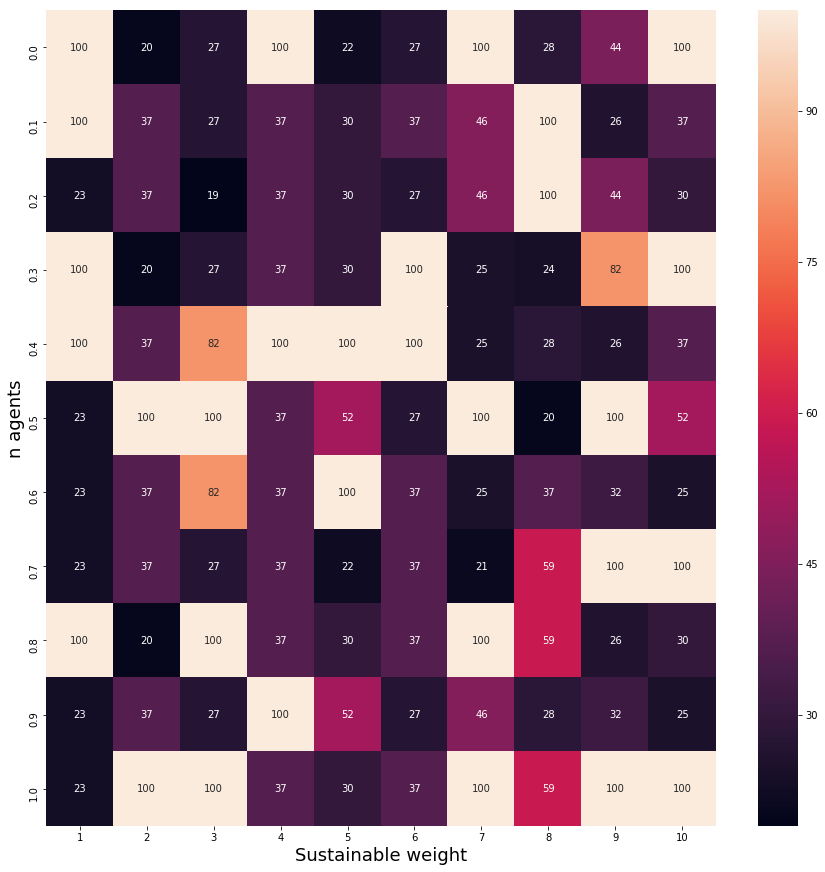

In [6]:
# Plotting correlation matrix
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(df, annot=True, fmt="d")
plt.xlabel('Sustainable weight', fontsize=18)
plt.ylabel('n agents', fontsize=18)

In [9]:
df.to_csv("05052018.csv", sep='\t')

In [10]:
pd.read_csv("05052018.csv", sep='\t', index_col=0)

,1,2,3,4,5,6,7,8,9,10
0.0,100,20,27,100,22,27,100,28,44,100
0.1,100,37,27,37,30,37,46,100,26,37
0.2,23,37,19,37,30,27,46,100,44,30
0.3,100,20,27,37,30,100,25,24,82,100
0.4,100,37,82,100,100,100,25,28,26,37
0.5,23,100,100,37,52,27,100,20,100,52
0.6,23,37,82,37,100,37,25,37,32,25
0.7,23,37,27,37,22,37,21,59,100,100
0.8,100,20,100,37,30,37,100,59,26,30
0.9,23,37,27,100,52,27,46,28,32,25
